------------------------------- Lead Scoring Case Study -------------------------------------

In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading our Dataset
df = pd.read_csv('Leads.csv')

In [3]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
# Data Exploration

In [5]:
# Data Cleaning
# Checking missing data

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# As we can See the data is pretty much dirty we need to clean
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
# For Cleaning purposes thes below criteria we are going to apply
# 1. if datatype is float or int , and if null values percentage are less than 15% then 
# we are going to fill the null values with median value, otherwise we will drop that column

# 2. if datatype is object and if null values percentage are less than 15% then we are going
# to fill the null values by mode values otherwise drop the column


In [9]:
# Creating Null Percent Column
npercent = df.isnull().sum()*(100/9240)
npercent = npercent.values

In [10]:
npercent

array([ 0.        ,  0.        ,  0.        ,  0.38961039,  0.        ,
        0.        ,  0.        ,  1.48268398,  0.        ,  1.48268398,
        1.11471861, 26.63419913, 15.56277056, 23.88528139, 29.11255411,
       29.31818182,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 36.28787879,
       51.59090909,  0.        ,  0.        , 29.31818182, 15.36796537,
       45.64935065, 45.64935065, 45.64935065, 45.64935065,  0.        ,
        0.        ,  0.        ])

In [11]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [12]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Now doing the operation based upon our code
for i in range(len(df.columns)):
    print(i)
    if npercent[i]<=15 and df[df.columns[i]].dtypes==int:
        df[df.columns[i]].fillna(df[df.columns[i]].median(),inplace = True)
for i in range(len(df.columns)):
    print(i)
    if npercent[i]<=15 and df[df.columns[i]].dtypes==float:
        df[df.columns[i]].fillna(df[df.columns[i]].median(),inplace = True)
for i in range(len(df.columns)):
    print(i)
    if npercent[i]<=15 and df[df.columns[i]].dtypes=='O':
        df[df.columns[i]].fillna(df[df.columns[i]].mode()[0],inplace = True)
for i in df.isnull().sum().index:
    if df[i].isnull().sum()!=0:
        df.drop(i,axis = 1, inplace = True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [14]:
pd.set_option('display.max_columns', None)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,No,No,No,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent


<function matplotlib.pyplot.show(close=None, block=None)>

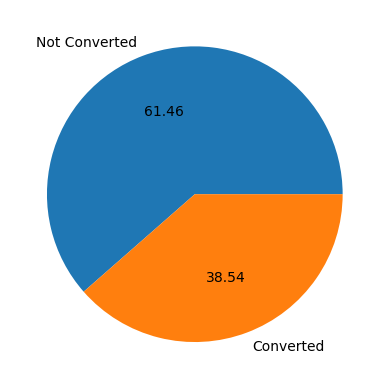

In [15]:
# insight for how many people are able to convert and how many people are not
# able to convert out from total lead

val= df['Converted'].value_counts().values
label = ['Not Converted','Converted']
plt.pie(x=val,labels=label,autopct="%.2f")
plt.show

    

#### 38.54 % People are converted that means sell has been done
#### 61.46 % People are not able to convert that means sell has not been done

In [16]:
lo=df[df["Converted"]==1]["Lead Origin"].value_counts()
lo

Lead Origin
Landing Page Submission    1768
API                        1115
Lead Add Form               664
Lead Import                  13
Quick Add Form                1
Name: count, dtype: int64

<Axes: ylabel='Lead Origin'>

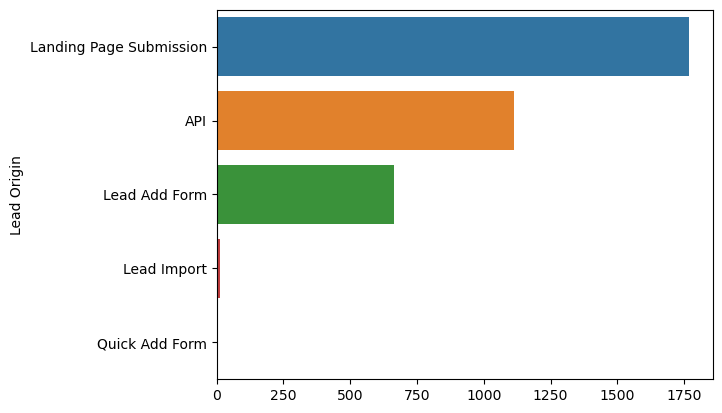

In [17]:
 #Vizualization

sns.barplot(y = lo.index,x=lo.values)

#### Landing Page Submission we are getting Highest Lead Conversion

In [18]:
# Lead Source

ls = df['Lead Source'].value_counts().head(5)

<Axes: ylabel='Lead Source'>

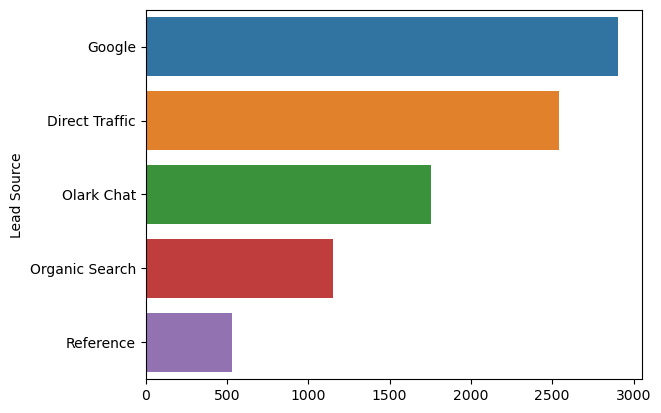

In [19]:
# Vizualization for Top Lead Sources

sns.barplot(y = ls.index,x = ls.values)

#### Google is the highest Lead source

In [20]:
df['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [21]:
df['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [22]:
# Count occurrences of '1' and '0' for 'Do Not Emails' and 'Do Not Call'
email_converted_counts = df.groupby(['Do Not Email', 'Converted']).size().unstack(fill_value=0)
call_converted_counts = df.groupby(['Do Not Call', 'Converted']).size().unstack(fill_value=0)
print(email_converted_counts)
print(call_converted_counts)

Converted        0     1
Do Not Email            
No            5063  3443
Yes            616   118
Converted       0     1
Do Not Call            
No           5679  3559
Yes             0     2


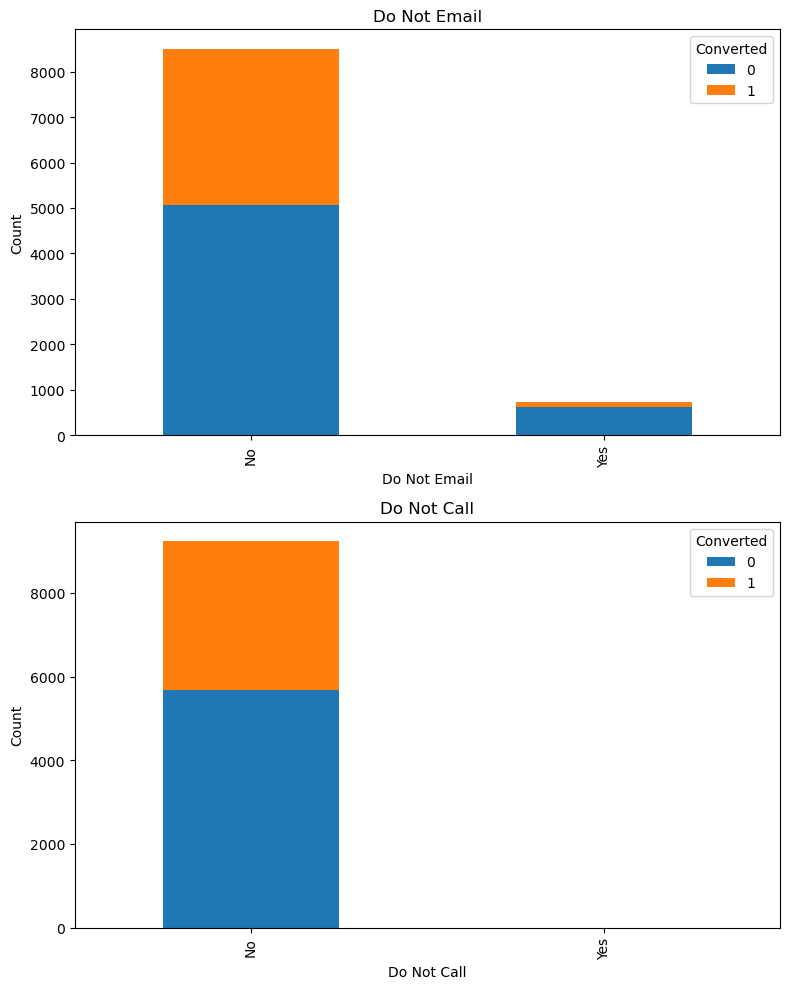

In [23]:


# Plotting bar graphs
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Bar graph for 'Do Not Emails'
email_converted_counts.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Do Not Email')
axes[0].set_xlabel('Do Not Email')
axes[0].set_ylabel('Count')
axes[0].legend(title='Converted')

# Bar graph for 'Do Not Call'
call_converted_counts.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Do Not Call')
axes[1].set_xlabel('Do Not Call')
axes[1].set_ylabel('Count')
axes[1].legend(title='Converted')

plt.tight_layout()
plt.show()

#### the conversion of leads via Emails and Call are same 38.5% but most of the people don't opted for that they want any Call 

In [24]:
df.groupby(['TotalVisits','Converted']).value_counts().values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
# Grouping by TotalVisits and calculating the sum of Converted
visits_conversion = df.groupby('TotalVisits')['Converted'].sum().reset_index()

print(visits_conversion)


    TotalVisits  Converted
0           0.0        916
1           1.0         60
2           2.0        537
3           3.0        586
4           4.0        448
5           5.0        316
6           6.0        178
7           7.0        122
8           8.0        103
9           9.0         73
10         10.0         57
11         11.0         48
12         12.0         18
13         13.0         23
14         14.0         21
15         15.0          7
16         16.0         10
17         17.0          2
18         18.0          6
19         19.0          6
20         20.0          4
21         21.0          5
22         22.0          1
23         23.0          3
24         24.0          4
25         25.0          1
26         26.0          2
27         27.0          3
28         28.0          0
29         29.0          0
30         30.0          0
31         32.0          0
32         41.0          0
33         42.0          0
34         43.0          0
35         54.0          0
3

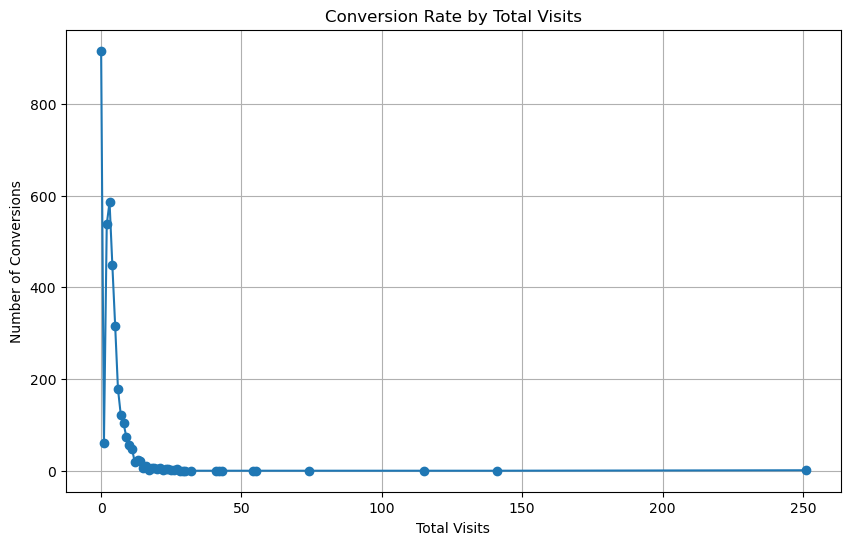

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(visits_conversion['TotalVisits'], visits_conversion['Converted'], marker='o', linestyle='-')
plt.title('Conversion Rate by Total Visits')
plt.xlabel('Total Visits')
plt.ylabel('Number of Conversions')
plt.grid(True)
plt.show()

#### Surprisingle the Customers  who had never visited the Website were  the Hot Leads ,besides it the Visits from 1-10 gave us successful Hot Leads

In [27]:
# Calculate mean time spent on website for converted and non-converted visitors
mean_time_converted = df[df['Converted'] == 1]['Total Time Spent on Website'].mean()
mean_time_not_converted = df[df['Converted'] == 0]['Total Time Spent on Website'].mean()

# Print the results
print("Mean time spent on website for converted visitors:", mean_time_converted)
print("Mean time spent on website for non-converted visitors:", mean_time_not_converted)

Mean time spent on website for converted visitors: 738.5467565290649
Mean time spent on website for non-converted visitors: 330.4044726184187


#### We have to reach those customers who are spending time on our website for atleast 738 seconds

In [28]:
# Calculate mean page views per visit for converted and non-converted visitors
mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()
mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# Print the results
print("Mean page views per visit for converted visitors:", mean_page_views_converted)
print("Mean page views per visit for non-converted visitors:", mean_page_views_not_converted)

Mean page views per visit for converted visitors: 2.3437068239258636
Mean page views per visit for non-converted visitors: 2.3660521218524386


#### Technically it doesnt matter how many pages a customer read as per data mentioned above

In [29]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

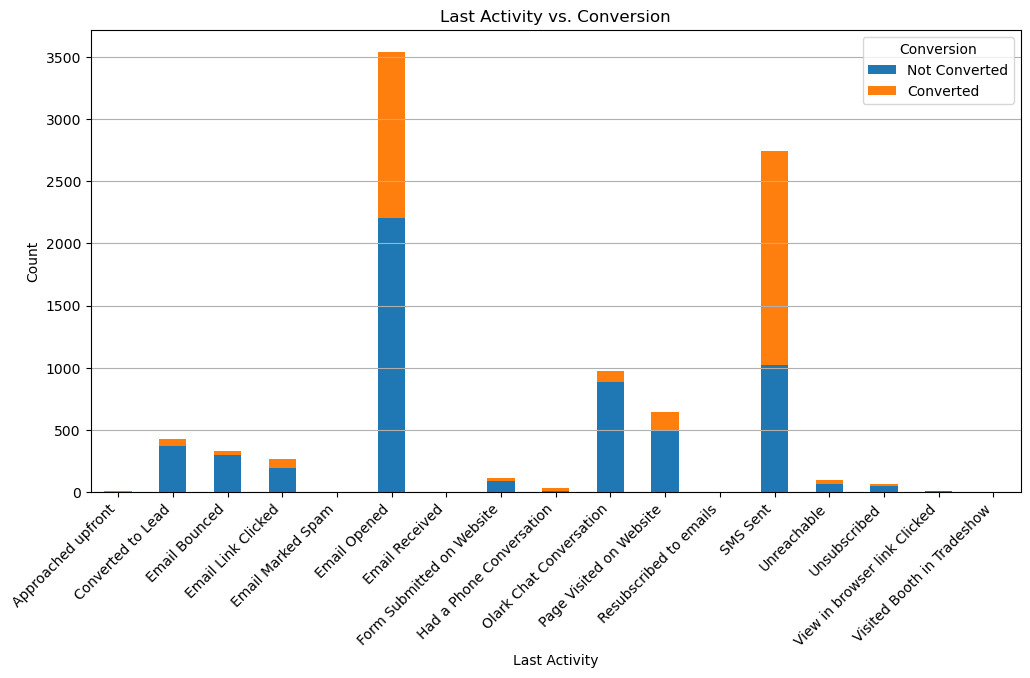

In [30]:
# Grouping by Last Activity and counting occurrences for converted and non-converted visitors
activity_counts = df.groupby(['Last Activity', 'Converted']).size().unstack(fill_value=0)

# Plotting stacked bar graph
activity_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Last Activity vs. Conversion')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Conversion', labels=['Not Converted', 'Converted'])
plt.grid(axis='y')
plt.show()


#### 'Email Opened' have most of the leads followed by 'SMS Sent'

In [31]:
# Selecting columns from DataFrame
platform_columns = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']

# Create an empty dictionary to store the counts
counts = {}

# Iterate through each column, calculate value counts for 'Yes', and store in the dictionary
for column in platform_columns:
    counts[column] = df[column].value_counts().get('Yes', 0)

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Yes_Count'])

# Display the counts DataFrame
print(counts_df)

                       Yes_Count
Magazine                       0
Newspaper Article              2
X Education Forums             1
Newspaper                      1
Digital Advertisement          4


#### So out of 9240 customers it seems that only very few customer had watched ads on these platforms ,company needs to grow there reach on these platforms


In [32]:
df['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

#### From above it seems that Recommendations are not  attracting Customers

In [33]:
df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

####  All the Customers have choosen 'No' for 'Receive More Updates About Our Courses'
 

In [34]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,No,No,No,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent


### Creating our Model

There are a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [35]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [36]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,No,SMS Sent


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [37]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [38]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,No,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,No,SMS Sent


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [39]:
# Check the columns which are of type 'object'

temp=df.loc[:,df.dtypes=='object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True).astype(float)


# Add the results to the master dataframe
df=pd.concat([df,dummy],axis=1)

In [41]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [42]:
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,674,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2.0,1532,2.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,305,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2.0,1428,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9236,0,2.0,238,2.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9237,0,2.0,199,2.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [43]:
# Import the required library
from sklearn.model_selection import train_test_split

In [44]:
# Put all the feature variables in X
X=df.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,674,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1532,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,305,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1428,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Now storing the target variable in 'y'

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Split the dataset into 70% train and 30% test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [47]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Scaling the three numerical features present in our dataset

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6795,0.015936,0.214349,0.024182,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3516,0.019920,0.046655,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8105,0.019920,0.541373,0.090909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3934,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

Since there are lot of variables in our dataset ,we are using RFE select a samll set of data for our model 

In [49]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [50]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [51]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 41),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', False, 11),
 ('Lead Source_testone', False, 45),
 ('Le

In [52]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [53]:
# select only the columns selected by RFE
X_train=X_train[col]

In [54]:
# importing statsmodels
import statsmodels.api as sm

In [55]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm=sm.add_constant(X_train)
lr2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.1
Date:                Sat, 18 May 2024   Deviance:                       5728.2
Time:                        11:36:10   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3584
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8344      0.084     -9.932      0.000      -0.999      -0.670
TotalVisits                                       6.6039      1.983      3.330      0.001       2.717      10.490
Total Time Spent on Website                       4.6454      0.160     29.069      0.000       4.332       4.959
Lead Origin_Lead Add Form                         3.2235      0.489      6.593      0.000       2.265       4.182
Lead Source_Olark Chat                            1.2226      0.104     11.723      0.000       1.018       1.427
Lead Source_Reference                             1.0081      0.520      1.938      0.053      -0.011       2.027
Lead Source_Welingak Website                      2.5013      0.869      2.878      0.004       0.798       4.205
Do Not Email_Yes                                 -1.3419      0.189     -7.113      0.000      -1.712      -0.972
Last Activity_Email Bounced                      -0.9853      0.340     -2.898      0.004      -1.652      -0.319
Last Activity_Had a Phone Conversation            1.5541      0.658      2.361      0.018       0.264       2.844
Last Activity_Olark Chat Conversation            -1.1261      0.188     -5.995      0.000      -1.494      -0.758
Last Notable Activity_Email Link Clicked         -1.8796      0.258     -7.274      0.000      -2.386      -1.373
Last Notable Activity_Email Opened               -1.3454      0.084    -16.033      0.000      -1.510      -1.181
Last Notable Activity_Modified                   -1.8498      0.092    -20.039      0.000      -2.031      -1.669
Last Notable Activity_Olark Chat Conversation    -1.6376      0.365     -4.491      0.000      -2.352      -0.923
Last Notable Activity_Page Visited on Website    -1.7661      0.191     -9.234      0.000      -2.141      -1.391
=================================================================================================================
"""

In [56]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.67
4,Lead Source_Reference,12.88
5,Lead Source_Welingak Website,3.77
9,Last Activity_Olark Chat Conversation,1.92
12,Last Notable Activity_Modified,1.89
6,Do Not Email_Yes,1.83
7,Last Activity_Email Bounced,1.80
0,TotalVisits,1.59
1,Total Time Spent on Website,1.59
3,Lead Source_Olark Chat,1.59


VIFs seem to be in a decent range except for two variables. 

Let's first drop the variable `Lead Origin_Lead Add Form` since it has a high p-value as well as a high VIF.

In [57]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [58]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.1
Date:                Sat, 18 May 2024   Deviance:                       5786.3
Time:                        11:36:10   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3526
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7494      0.082     -9.137      0.000      -0.910      -0.589
TotalVisits                                       5.5034      1.865      2.951      0.003       1.849       9.158
Total Time Spent on Website                       4.5400      0.158     28.778      0.000       4.231       4.849
Lead Source_Olark Chat                            1.1585      0.103     11.280      0.000       0.957       1.360
Lead Source_Reference                             4.1587      0.200     20.766      0.000       3.766       4.551
Lead Source_Welingak Website                      5.6388      0.726      7.772      0.000       4.217       7.061
Do Not Email_Yes                                 -1.2493      0.185     -6.763      0.000      -1.611      -0.887
Last Activity_Email Bounced                      -0.9556      0.334     -2.861      0.004      -1.610      -0.301
Last Activity_Had a Phone Conversation            1.5239      0.655      2.327      0.020       0.240       2.808
Last Activity_Olark Chat Conversation            -1.1366      0.187     -6.067      0.000      -1.504      -0.769
Last Notable Activity_Email Link Clicked         -1.9065      0.258     -7.399      0.000      -2.411      -1.401
Last Notable Activity_Email Opened               -1.3680      0.084    -16.380      0.000      -1.532      -1.204
Last Notable Activity_Modified                   -1.8615      0.092    -20.297      0.000      -2.041      -1.682
Last Notable Activity_Olark Chat Conversation    -1.6348      0.363     -4.509      0.000      -2.345      -0.924
Last Notable Activity_Page Visited on Website    -1.7551      0.189     -9.303      0.000      -2.125      -1.385
=================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,1.92
11,Last Notable Activity_Modified,1.89
5,Do Not Email_Yes,1.83
6,Last Activity_Email Bounced,1.80
0,TotalVisits,1.59
1,Total Time Spent on Website,1.59
2,Lead Source_Olark Chat,1.59
10,Last Notable Activity_Email Opened,1.45
12,Last Notable Activity_Olark Chat Conversation,1.33
13,Last Notable Activity_Page Visited on Website,1.16


#### Now All Things  are Fine

##  Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [60]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

1871    0.277443
6795    0.253731
3516    0.352311
8105    0.859617
3934    0.188225
4844    0.912292
3297    0.139215
8071    0.979720
987     0.270615
7423    0.919853
dtype: float64

In [61]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27744302, 0.25373111, 0.35231116, 0.8596167 , 0.18822458,
       0.91229171, 0.13921476, 0.97971978, 0.2706148 , 0.91985336])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [62]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.277443
1,0,0.253731
2,0,0.352311
3,0,0.859617
4,0,0.188225
5,1,0.912292
6,0,0.139215
7,1,0.979720
8,0,0.270615
9,1,0.919853


###  Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [63]:
y_train_pred_final['Predicted']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.277443,0
1,0,0.253731,0
2,0,0.352311,0
3,0,0.859617,1
4,0,0.188225,0
5,1,0.912292,1
6,0,0.139215,0
7,1,0.979720,1
8,0,0.270615,0
9,1,0.919853,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [64]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [65]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
print(confusion)

[[3499  503]
 [ 799 1667]]


In [66]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7987012987012987


In [67]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Calculate the sensitivity

TP/(TP+FN)

0.6759935117599352

In [69]:
# Calculate the specificity

TN/(TN+FP)

0.8743128435782109

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [70]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

    

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

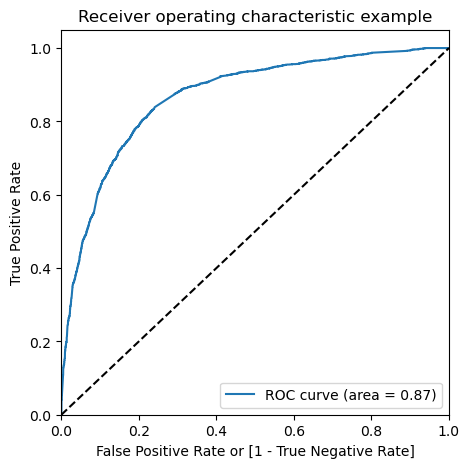

In [72]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [73]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.277443,0,1,1,1,0,0,0,0,0,0,0
1,0,0.253731,0,1,1,1,0,0,0,0,0,0,0
2,0,0.352311,0,1,1,1,1,0,0,0,0,0,0
3,0,0.859617,1,1,1,1,1,1,1,1,1,1,0
4,0,0.188225,0,1,1,0,0,0,0,0,0,0,0


In [74]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.561843  0.968775  0.311094
0.2   0.2  0.739023  0.903487  0.637681
0.3   0.3  0.791126  0.827656  0.768616
0.4   0.4  0.797619  0.759124  0.821339
0.5   0.5  0.798701  0.675994  0.874313
0.6   0.6  0.776747  0.548256  0.917541
0.7   0.7  0.763451  0.465937  0.946777
0.8   0.8  0.738714  0.369830  0.966017
0.9   0.9  0.684756  0.192214  0.988256


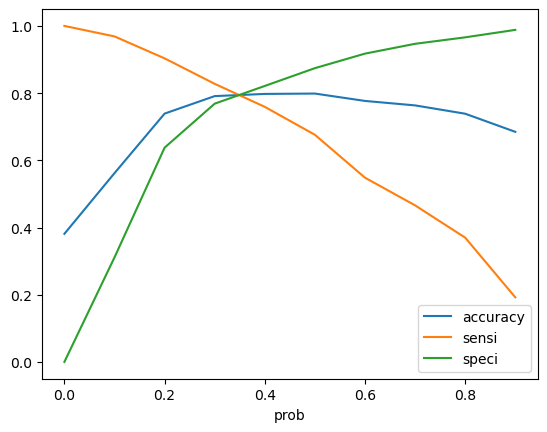

In [75]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.36, you get the optimal values of the three metrics. So let's choose 0.36 as our cutoff now.

In [76]:
y_train_pred_final['Final_predicted']=y_train_pred_final.Conversion_Prob.map(lambda x:1 if x> 0.36 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.277443,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.253731,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.352311,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.859617,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.188225,0,1,1,0,0,0,0,0,0,0,0,0
5,1,0.912292,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.139215,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.979720,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.270615,0,1,1,1,0,0,0,0,0,0,0,0
9,1,0.919853,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_predicted'])

0.7959183673469388

In [80]:
# Let's create the confusion matrix once again
confusion2=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Final_predicted'])
confusion2

array([[3192,  810],
       [ 510, 1956]], dtype=int64)

In [81]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Calculate Sensitivity

TP/(TP+FN)

0.7931873479318735

In [83]:
# Calculate Specificity

TN/(TN+FP)

0.7976011994002998

This cutoff point seems good to go!

###  Making Predictions on the Test Set




In [84]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [85]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,0.031873,0.444982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2376,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.019920,0.025968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9199,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4359,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [88]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,1.0,0.031873,0.444982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2376,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,1.0,0.019920,0.025968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9199,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4359,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2152,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7101,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5331,1.0,0.011952,0.707746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference'], axis=1, inplace = True)

In [94]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.808960
2376    0.967618
7766    0.358433
9199    0.069937
4359    0.886129
9186    0.639877
1631    0.505746
8963    0.174668
8007    0.129892
5324    0.394536
dtype: float64

In [97]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.808960
2376,0.967618
7766,0.358433
9199,0.069937
4359,0.886129


In [99]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [101]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

In [102]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.808960
1,1,0.967618
2,1,0.358433
3,0,0.069937
4,1,0.886129


In [105]:
# Rename the column 
y_pred_final=y_pred_final.rename(columns={0:'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.808960
1,1,0.967618
2,1,0.358433
3,0,0.069937
4,1,0.886129


In [108]:
# Make predictions on the test set using 0.36 as the cutoff
y_pred_final['Final_predicted']=y_pred_final.Conversion_Prob.map(lambda x:1 if x > 0.36 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Final_predicted
0,1,0.808960,1
1,1,0.967618,1
2,1,0.358433,0
3,0,0.069937,0
4,1,0.886129,1


In [111]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final_predicted'])

0.8001443001443002

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_predicted'] )
confusion2

array([[1354,  323],
       [ 231,  864]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Calculate sensitivity
TP / float(TP+FN)

0.7890410958904109

In [132]:
# Calculate specificity
TN / float(TN+FP)

0.8073941562313656

### Precision-Recall View

Let's now also build the training model using the precision-recall view

In [133]:
#Looking at the confusion matrix again
confusion= metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_predicted'] )
confusion

array([[3360,  642],
       [ 657, 1809]], dtype=int64)

In [134]:
# Precision
#TP / (TP + FP)
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7380660954712362

In [135]:
#Recall
#TP / (TP + FN)
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.7335766423357665

In [136]:
from sklearn.metrics import precision_recall_curve

In [142]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

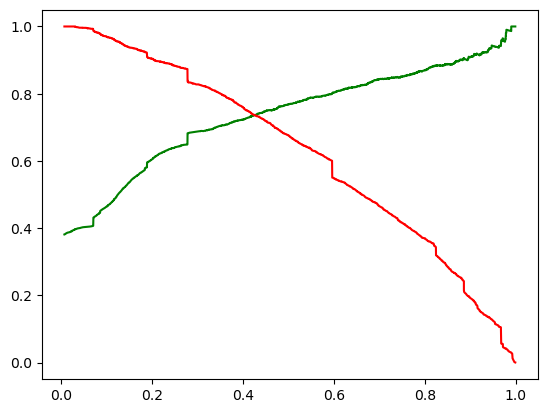

In [144]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.drop(['final_predicted'],axis=1,inplace=True)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.277443,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.253731,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.352311,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.859617,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.188225,0,1,1,0,0,0,0,0,0,0,0,0


In [149]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.799165120593692

In [151]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[3360,  642],
       [ 657, 1809]], dtype=int64)

In [152]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Calculate Precision

TP/(TP+FP)

0.7380660954712362

In [154]:
# Calculate Recall

TP/(TP+FN)

0.7335766423357665

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [156]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

4269    0.808960
2376    0.967618
7766    0.358433
9199    0.069937
4359    0.886129
9186    0.639877
1631    0.505746
8963    0.174668
8007    0.129892
5324    0.394536
dtype: float64

In [159]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.808960
2376,0.967618
7766,0.358433
9199,0.069937
4359,0.886129


In [160]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [162]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
# Check 'y_pred_final'
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.808960
1,1,0.967618
2,1,0.358433
3,0,0.069937
4,1,0.886129


In [166]:
# Make predictions on the test set using 0.43 as the cutoff

y_pred_final['Final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Final_predicted
0,1,0.808960,1
1,1,0.967618,1
2,1,0.358433,0
3,0,0.069937,0
4,1,0.886129,1


In [168]:
# accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final_predicted'])

0.8005050505050505

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_predicted'])
confusion2

array([[1425,  252],
       [ 301,  794]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Precision

TP/(TP+FP)

0.7590822179732314

In [173]:
# Recall

TP/(TP+FN)

0.7251141552511415